# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*



# Written Report
## Data Validation

This dataset consists of 947 rows and 8 columns. I've validated all columns according to data type in Data Information and made some changes as described below:

- recipe: numeric, no missing values and unique values. No cleaning is needed.
- calories: numeric, 52 missing values removed. 
- carbohydrate: numeric, 52 missing values removed. 
- sugar: numeric, 52 missing values removed. 
- protein: numeric, 52 missing values removed. 
- category: object. 11 categories were provided. "Chicken Breast" was merged into "Chicken", and data type was changed to *category*. No missing values.
- servings: object. Entries "4-6 as a snack" were corrected with their respective number. Data type changed to *integer*. No missing values.
- high_traffic: Object. Missing values considered as non high traffic recipes and they are not meant to be removed.


In [37]:
# Importing Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler
sns.set_palette("deep")
sns.set_style("whitegrid")

In [38]:
#Data Validation
recipes = pd.read_csv("recipe_site_traffic_2212.csv")
print(recipes.shape)
display(recipes.head(5))
print(round(recipes.describe(),2))

(947, 8)


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


       recipe  calories  carbohydrate   sugar  protein
count  947.00    895.00        895.00  895.00   895.00
mean   474.00    435.94         35.07    9.05    24.15
std    273.52    453.02         43.95   14.68    36.37
min      1.00      0.14          0.03    0.01     0.00
25%    237.50    110.43          8.38    1.69     3.20
50%    474.00    288.55         21.48    4.55    10.80
75%    710.50    597.65         44.96    9.80    30.20
max    947.00   3633.16        530.42  148.75   363.36


In [39]:
#Column types and NA values
display(recipes.info())
display(recipes.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


None

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [40]:
#validate column "category"
print(recipes["category"].unique())
recipes["category"].replace(to_replace = {"Chicken Breast" : "Chicken"}, inplace= True)
recipes["category"] = recipes["category"].astype("category")

['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


In [41]:
#validate column "servings"
display(recipes["servings"].value_counts())
recipes["servings"].replace(to_replace = {"4 as a snack" : 4, "6 as a snack" : 6}, inplace= True)
recipes["servings"] = recipes["servings"].astype(int)

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

Missing values (52) represent 5,5% of dataset rows. Besides it's above common practice threshold (5%), I consider it's within aceptable range.

In [42]:
#removing missing values
recipes.dropna(subset = ["calories", "carbohydrate","sugar", "protein"], inplace= True)
print("Dataset without missing values:" ,recipes.shape)

Dataset without missing values: (895, 8)


In [43]:
#encoding target variable for visualization and modeling
recipes["high_traffic"].fillna(value = "Low", inplace=True)
recipes["high_traffic_num"] = recipes["high_traffic"].apply(lambda val: 1 if val == "High" else 0)

## Data Visualization and Exploratory Analysis

### Single Variables
#### High Traffic
As the High Traffic feature is what we'll be predicting, it's our target variable. From the Count visualization below, we note that 59,8% of the recipes have been classified as "High Traffic", resulting in a balanced class.

[Text(0, 0, '535'), Text(0, 0, '360')]

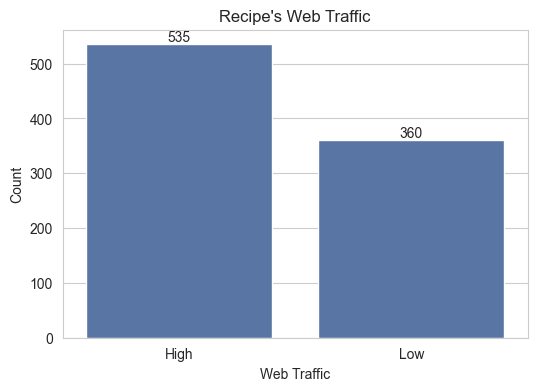

In [44]:
fig1, ax1 = plt.subplots(figsize= (6,4))
ax1 = sns.countplot(data= recipes, x = "high_traffic")
ax1.set(xlabel = "Web Traffic", ylabel = "Count", title = "Recipe's Web Traffic")
ax1.bar_label(ax1.containers[0], fontsize=10)

#### Numeric Features
From the single variable histograms below we can appreciate that all continuous numeric features are right skewed. Transformation would be necessary for models with a normal distribution assumption. No transformation would be needed for discrete variable "Servings".

Text(0.5, 0.98, 'Single Variables Histograms')

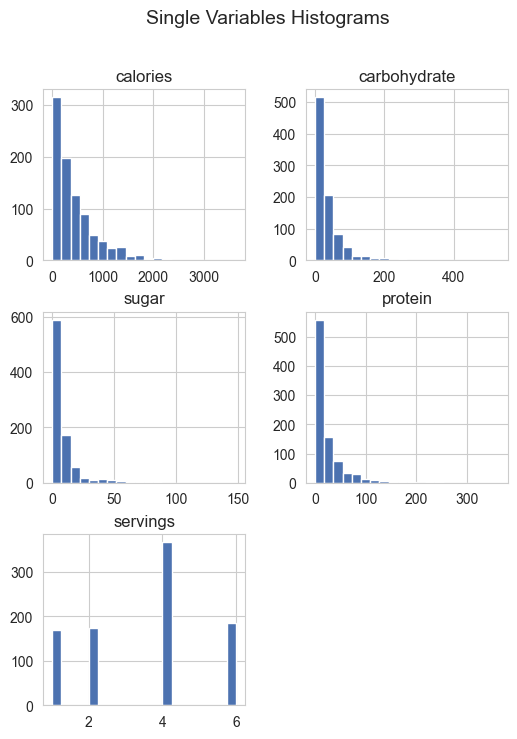

In [45]:
fig2 = plt.figure(figsize = (6,8))
ax2 = fig2.gca()
recipes[["calories","carbohydrate", "sugar", "protein", "servings"]].hist(ax = ax2, bins=20)
fig2.suptitle("Single Variables Histograms", size = 14)

### Multiple Variables
#### Per Category
The website increasing traffic is strongly related on the recipe category. "Vegetable", "Pork" and "Potato" have the highest mean of high traffic, while "Beverages" chances are extremely low.

[Text(0, 0.5, 'Categories'),
 Text(0.5, 0, 'High Traffic %'),
 Text(0.5, 1.0, 'High Traffic Probability per Categories')]

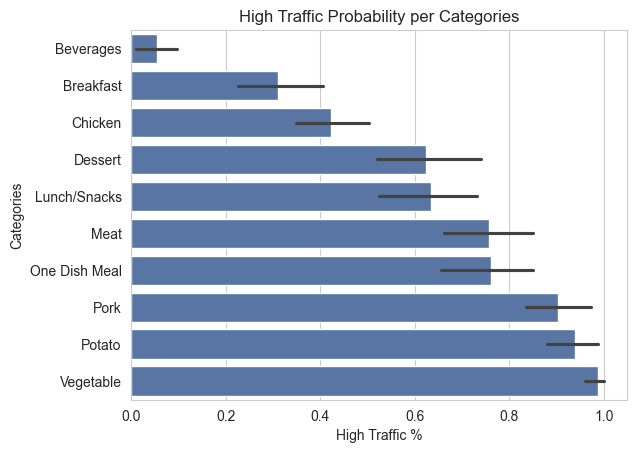

In [46]:
fig3, ax3 = plt.subplots()
ax3 = sns.barplot(data= recipes, y = "category", x= "high_traffic_num", orient = "h")
ax3.set(ylabel = "Categories", xlabel = "High Traffic %", title = "High Traffic Probability per Categories")

#### Numeric features relationship
I've checked the relationship between numeric features, where I note there is no significant linear correlation among them.

Text(0.5, 1.03, 'Numeric Features Correlation Heatmap')

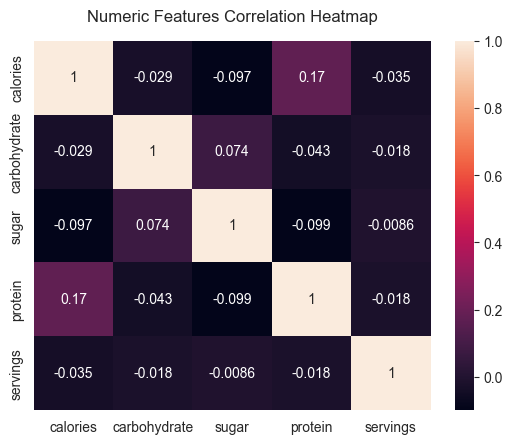

In [47]:
fig4, ax4 = plt.subplots()
ax4 = sns.heatmap(recipes[["calories", "carbohydrate", "sugar", "protein", "servings"]].corr(), annot = True)
ax4.set_title("Numeric Features Correlation Heatmap", y=1.03, fontdict= {'fontsize': 12})

## Model Fitting and Evaluation

Predicting whether a recipe will lead to a high traffic on the company's website is a classification problem in supervised machine learning. I'm choosing Logistic Regression as a baseline model as it is easy to fit and interpret. The results will be compared with a Decision Tree for Classification as it is a flexible model with no assumptions about data distribution.

Since we've been asked to predict which recipes will be popular 80% of the time and minimize the chance of showing unpopular recipes, I've chosen "precision" as the metric to compare models as it measures false positives impact.

### Data modeling preparation

I've encoded category feature and split data into features (X) and target variable (y)


In [48]:
recipes_enc = pd.get_dummies(recipes, columns= ["category"], prefix="cat_", dtype= "int")
X = recipes_enc.drop(["recipe","high_traffic", "high_traffic_num"], axis=1)
y = recipes["high_traffic_num"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 5)

### Baseline model: Logistic Regression

In [49]:
lr = LogisticRegression(max_iter= 200, random_state= 5 )
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_precision = precision_score(y_test, y_pred_lr)
print("Baseline Logistic Regression  Model Precision: {:.3f}".format(lr_precision))

Baseline Logistic Regression  Model Precision: 0.819


### Comparison model: Decision Tree

In [50]:
dt = DecisionTreeClassifier(max_depth = 6, random_state=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_precision = precision_score(y_test, y_pred_dt)
print("Comparison Decision Tree Model Precision: {:.3f}".format(dt_precision))

Comparison Decision Tree Model Precision: 0.771


Finding the best max depth for test precision

Best max_depth is:3 
Testing Precision is: 0.8143712574850299


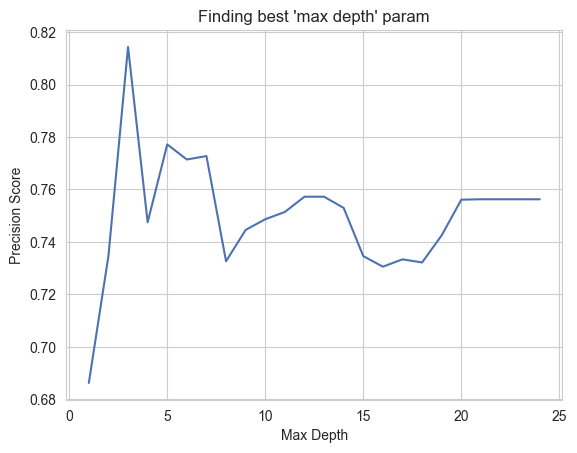

In [51]:
test_score = []
max_pair = (0,0)

for i in range (1,25):
    tree = DecisionTreeClassifier(max_depth = i, random_state = 5)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    test_score.append(precision_score(y_test, y_pred))
    test_pair = (i,precision_score(y_test, y_pred) )
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()
ax.plot(np.arange(1,25), test_score, label = "Test Precision")
ax.set(ylabel = "Precision Score", xlabel = "Max Depth", title = "Finding best 'max depth' param")
print(f"Best max_depth is:{max_pair[0]} \nTesting Precision is: {max_pair[1]}")

## Results Analysis

Precision for Logistic Regression is slightly higher than Decision Tree model (81,9% vs 81,4%), meaning that more "High Traffic" classified recipes will efectively result in a higher traffic.

Since we'll be working with Logistic Regression model, continuous features are standarized since this model is sensitive to scale and features are also skewed as mentioned earlier. Only training data is used to fit the Scaler in order to avoid Data Leakage.

In [52]:
columns_to_stand = ["calories", "carbohydrate", "sugar", "protein"]
scaler = StandardScaler()
X_train_stand_cols = scaler.fit_transform(X_train[columns_to_stand])
X_test_stand_cols = scaler.transform(X_test[columns_to_stand])
X_train_scaled = np.hstack((X_train_stand_cols, X_train.drop(columns_to_stand, axis=1)))
X_test_scaled = np.hstack((X_test_stand_cols, X_test.drop(columns_to_stand, axis=1)))

lr_scaled = LogisticRegression(max_iter= 2000, random_state= 5 )
lr_scaled.fit(X_train_scaled, y_train)
y_pred_lr_scaled = lr_scaled.predict(X_test_scaled)
lr_scaled_precision = precision_score(y_test, y_pred_lr_scaled)
print("Scaled Logistic Regression  Model Precision: {:.3f}".format(lr_scaled_precision))

Scaled Logistic Regression  Model Precision: 0.819


## Evaluate by Business Criteria

We've been asked to predict which recipes will be popular 80% of the time. So we'll select recipes from both models with a probability iqual or greater than 80%  to be "High traffic" class and then evaluate their actual class, using this percentage as a KPI for the business evaluation.
The higher the percentage, the better the model performs.

#### Logistic Regression KPI

In [53]:
lr_scaled_KPI = pd.DataFrame(lr_scaled.predict_proba(X_test_scaled)[:,1]).rename(columns={0:"lr_prob"})
lr_scaled_KPI["predicted_class"] = y_pred_lr_scaled
lr_scaled_KPI["actual_class"] = y_test.values
lr_scaled_KPI["correct"] = (lr_scaled_KPI['predicted_class'] == lr_scaled_KPI['actual_class']).astype(int)
lr_scaled_KPI_80perc = lr_scaled_KPI[lr_scaled_KPI["lr_prob"] >= 0.8]
print("Logistic Regression KPI \nCorrect predictions on >80% prob 'High Traffic' predicted class: {}".format(round(np.average(lr_scaled_KPI_80perc["correct"]),3)))

Logistic Regression KPI 
Correct predictions on >80% prob 'High Traffic' predicted class: 0.973


#### Decision Tree KPI

In [54]:
dt_KPI = pd.DataFrame(dt.predict_proba(X_test)[:,1]).rename(columns={0:"dt_prob"})
dt_KPI["predicted_class"] = y_pred_dt
dt_KPI["actual_class"] = y_test.values
dt_KPI["correct"] = (dt_KPI['predicted_class'] == dt_KPI['actual_class']).astype(int)
dt_KPI_80perc = dt_KPI[dt_KPI["dt_prob"] >= 0.8]
print("Decision Tree KPI \nCorrect predictions on >80% prob 'High Traffic' predicted class: {}".format(round(np.average(dt_KPI_80perc["correct"]),3)))

Decision Tree KPI 
Correct predictions on >80% prob 'High Traffic' predicted class: 0.897


After selecting recipes with a high traffic probability of 80% or greater from each model, the Logistic Regression percentage of succes was about 97.3%, higher than Decision Tree's 89.7%.
We should have in mind that the product manager's performance when selecting popular recipes based on his criteria was about 40%.

## Recommendation

For the next steps I recommend applying A/B Testing on website for the next month in order to monitor the performance of different recipes on the web traffic and compare them against the estimated KPI. 

If it results as expected, we'd proceed deploying **Logistic Regression** model into production. By doing this, around 97.3% of the selected recipes will result in a web traffic increase resulting in more subscriptions.

Also I recommend to continuously improve the model by collecting more data about the recipes for performing fine tuning. Also it would be helpful to receive the missing information in the dataset: cost per serving, ingredients, etc.



## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation